In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Linear_Regression\Datasets\weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df = df[['Height','Weight']]
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

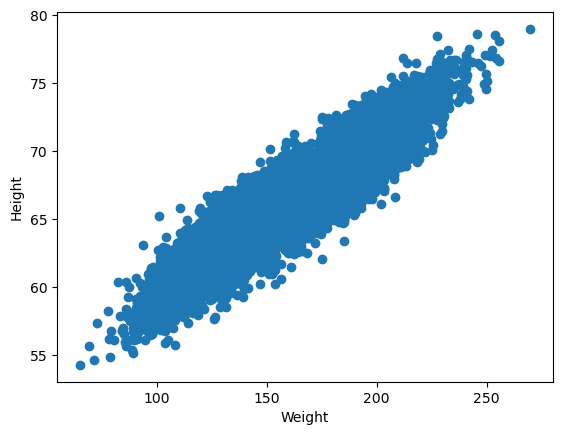

In [4]:
# to see the relation between height and weight we can use scatter plot 

plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
# correlation: highly positively co-related
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


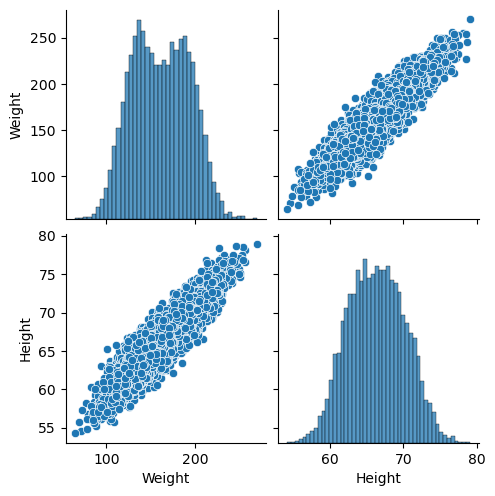

In [6]:
sns.pairplot(df[['Weight','Height']])

In [14]:
# Independent and Dependent Features
X_series = df['Weight']
print(type(X_series))
print(X_series)
np.array(X_series).shape

<class 'pandas.core.series.Series'>
0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64


(10000,)

In [17]:
# the independent variable has to be either dataframe or 2d array arrays
# so we enclose them in [['Weight']]
X = df[['Weight']]
# we can keep this as series as in this problem we are using regression -> one output
# we can keep this as a series or 1d array
y = df['Height']  
type(X)
np.array(X).shape

(10000, 1)

In [18]:
# Train Test Split 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
print(X.shape)
print("X:")
print(X_train.shape)
print(X_test.shape)
print("y:")
print(y_train.shape)
print(y_test.shape)

(10000, 1)
X:
(7500, 1)
(2500, 1)
y:
(7500,)
(2500,)


In [22]:
# Standardization
# if the value is higher like kg, all the math is applied on the bigger value 
# it will take more time for gradient descent to reach the local minima
# so we take each independent feature and apply (Z-Score (x-U)/sig)  
# all the datapoints will be converted into u=0, sig = 1

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [23]:
# now from above we transformed the train data, now using the same U (mean) and sigma (sig) 
# calculated above, we will just transform the X_test 
X_test = scaler.transform(X_test)
X_test

array([[ 0.37115893],
       [ 1.05964173],
       [ 0.28064585],
       ...,
       [-1.16697743],
       [ 0.1278561 ],
       [ 0.05862451]])

In [24]:
# Applying Linear Regression
from sklearn.linear_model import LinearRegression 

regression = LinearRegression()

In [25]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
# one unit movement in weight causes increase of 3.55 units in height
print("Coefficient or Slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or Slope:  [3.5520765]
Intercept:  66.34834766149207


Text(0.5, 1.0, 'Scatter Plot with Regression Line')

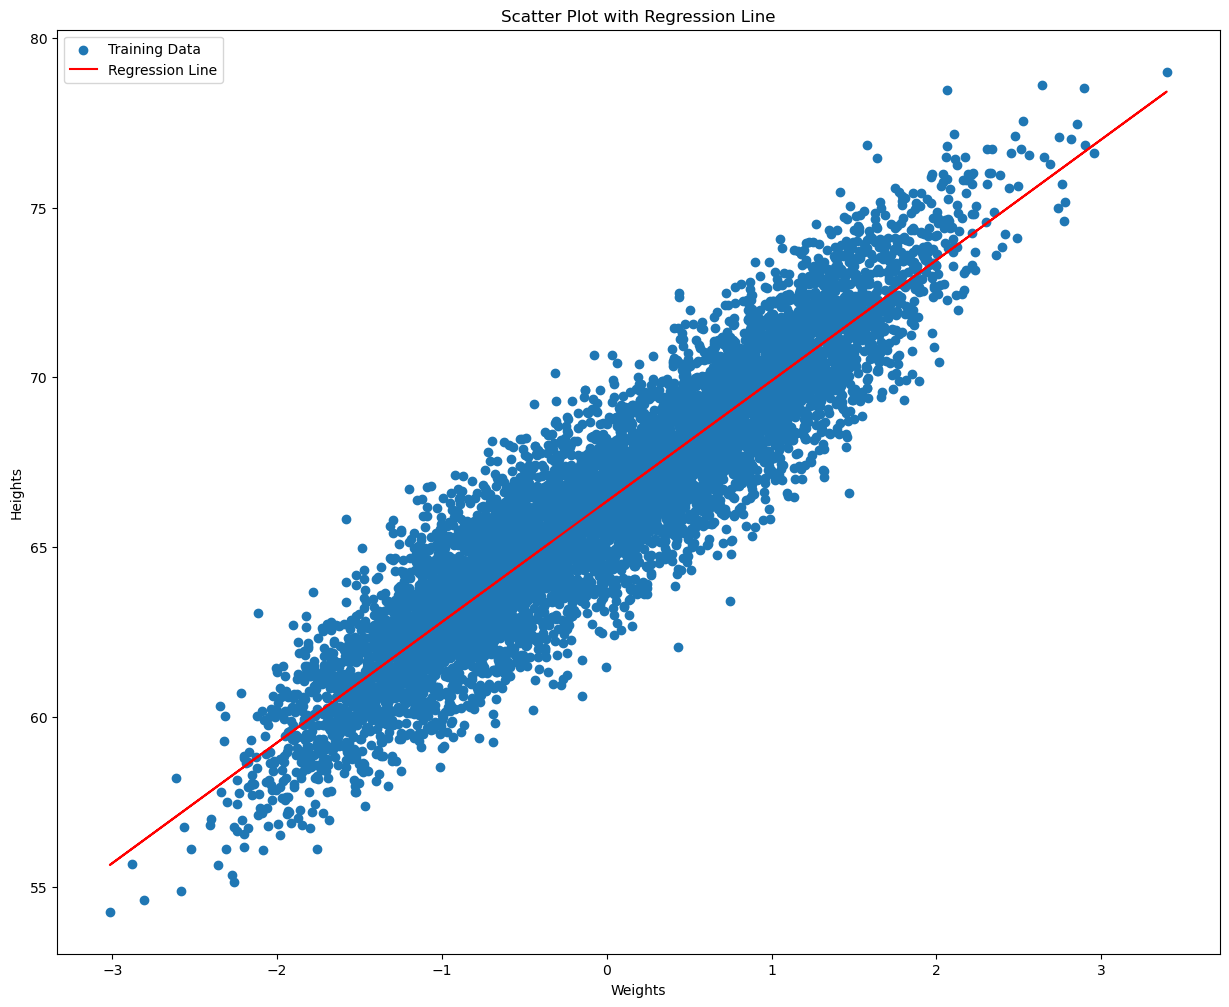

In [30]:
# plot the training data, and the best fit line
plt.figure(figsize=(15,12))

plt.scatter(X_train,y_train,label='Training Data')
plt.plot(X_train,regression.predict(X_train),color='red',label='Regression Line')
plt.xlabel('Weights')
plt.ylabel('Heights')
plt.legend()
plt.title("Scatter Plot with Regression Line")

In [31]:
# Prediction for test Data:

y_pred = regression.predict(X_test)

In [32]:
# Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  2.1245002931280457
MAE:  1.1618686241050298
RMSE:  1.4575665655907608


In [35]:
# R Square
from sklearn.metrics import r2_score 

score = r2_score(y_test,y_pred)
print("R-Squared: ",score)

R-Squared:  0.857428881104187


In [36]:
# Adjusted R Square
n = len(y_test)
k = X_test.shape[1]  # number of predictor variables 
r_adj = 1 - (1-score)*((n-1)/(n-k-1))
print("Adjusted R Squared: ",r_adj)

Adjusted R Squared:  0.8573718069973433


In [37]:
# bias/variance trade-off

y_pred_train = regression.predict(X_train)

score_trained_data = r2_score(y_train,y_pred_train)
print("For trained data R-Square value: ",score_trained_data)


For trained data R-Square value:  0.854398652817324


In [38]:
# OLS Linear Regression

import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()

prediction = model.predict(X_test)

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Fri, 22 Nov 2024   Prob (F-statistic):                    3.63e-06
Time:                        18:07:51   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.5521      0.766      4.635      0.000       2.050       5.054
==============================================================================
Omnibus:                        3.836   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.869
Skew:                          -0.053   Prob(JB):                        0.144
Kurtosis:                       2.968   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Prediction for new Data

new_df = pd.DataFrame({
    'Weight': [72,60]
})

regression.predict(scaler.transform(new_df[['Weight']]))

array([56.45016021, 55.11902451])

In [ ]:
# Then we have successfully developed the model